 In this project, you are going to work on the Census Income dataset from the
UCI Machine Learning Repository that contains the income information for over
48,000 individuals taken from the 1994 US census.
For more details about this dataset, you can refer to the following link:
https://archive.ics.uci.edu/ml/datasets/census+income
    
### Problem Statement:

In this project, initially you need to preprocess the data and then develop an
understanding of the different features of the data by performing exploratory
analysis and creating visualizations. Further, after having sufficient knowledge
about the attributes, you will perform a predictive task of classification to predict
whether an individual makes over 50,000 a year or less by using different
machine learning algorithms.
### Tasks To Be Performed:

1. Perform Exploratory Data Analysis to find key insights.

2. Use various machine learning algorithms to predict the response variable.

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# Ensure plots are displayed inline in Jupyter notebooks
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
df = pd.read_csv('census-income.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.shape

(32561, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14                   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
                   0
dtype: int64

In [11]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' '],
      dtype='object')

In [14]:
df['income'] = df.iloc[:, -1]

In [15]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' ', 'income'],
      dtype='object')

In [16]:
df = df.drop(columns=[' '])

In [27]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [36]:
# Ensure there are no missing values
df = df.dropna()

In [37]:
df.dtypes

age                int64
 workclass         int32
 fnlwgt            int64
 education         int32
 education-num     int64
 marital-status    int32
 occupation        int32
 relationship      int32
 race              int32
 sex               int32
 capital-gain      int64
 capital-loss      int64
 hours-per-week    int64
 native-country    int32
income             int32
dtype: object

In [38]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [39]:
# Check for any empty column names and drop those columns
df = df.loc[:, df.columns.notna()]

In [40]:
# Convert categorical Columns into numerical columns

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [41]:
# Split the dataset into features and target variable
X = df.drop(columns=['income'])
y = df['income']

In [42]:
# Ensure X and y have the same number of samples
assert len(X) == len(y), "Feature set and target variable have inconsistent numbers of samples."

In [43]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Display basic statistics
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [47]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


# Exploratory Data Analysis

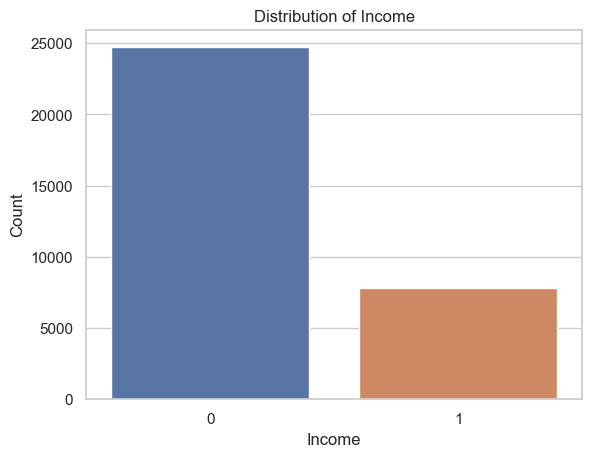

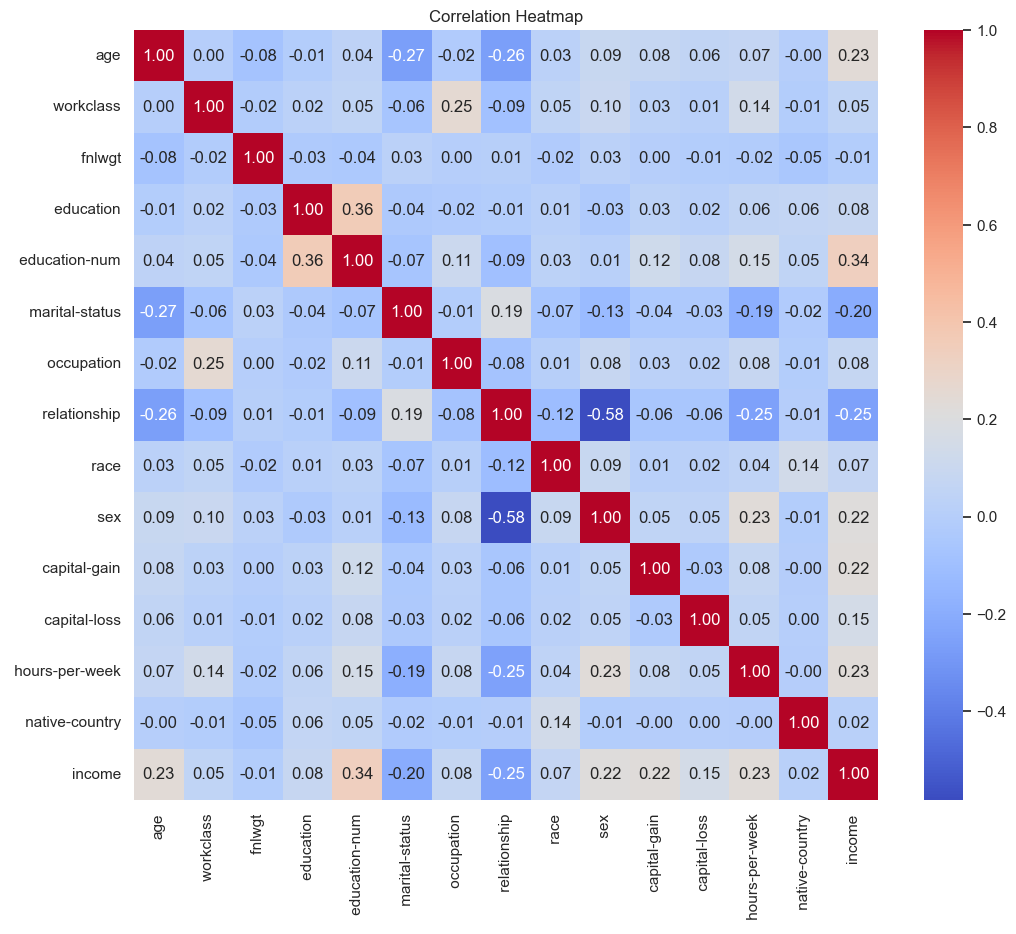

In [54]:
# Plot the distribution of the target variable


# Set the style of the plot
sns.set(style="whitegrid")

# Plot the distribution of the target variable
sns.countplot(x=df['income'])
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Train and Evaluate Machine Learning Models

## Logistic Regression

In [49]:
# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict the values on the test set
log_reg_predictions = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_predictions))


Logistic Regression Accuracy: 0.8258777766403931
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7455
           1       0.71      0.45      0.55      2314

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.83      0.81      9769



## Decision Tree Classifier

In [50]:
# Train the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict the values on the test set
dt_predictions = dt.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))


Decision Tree Accuracy: 0.8103183539768656
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7455
           1       0.60      0.61      0.60      2314

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



## Random Forest Classifier

In [51]:
# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict the values on the test set
rf_predictions = rf.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.8597604667826799
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7455
           1       0.74      0.63      0.68      2314

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.79      9769
weighted avg       0.85      0.86      0.86      9769



# Compare the Models

Logistic Regression Confusion Matrix:
[[7021  434]
 [1267 1047]]
Decision Tree Confusion Matrix:
[[6497  958]
 [ 895 1419]]
Random Forest Confusion Matrix:
[[6946  509]
 [ 861 1453]]


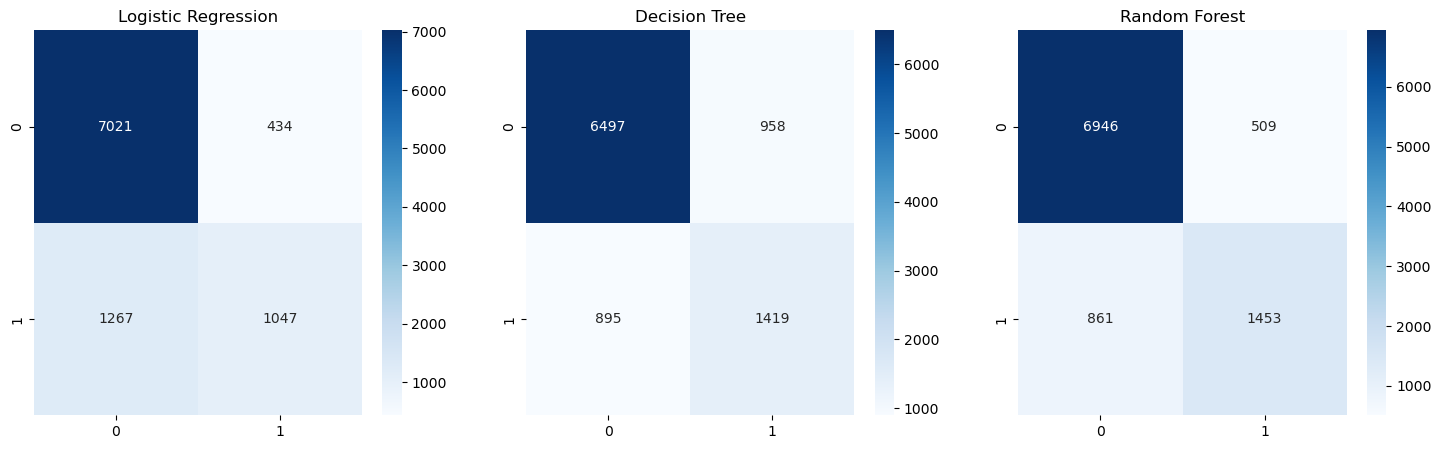

In [52]:
# Print the confusion matrix of all classifiers
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_predictions))

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

# Visualize confusion matrix using heatmaps
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, log_reg_predictions), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Logistic Regression')

sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Decision Tree')

sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', ax=ax[2], cmap='Blues')
ax[2].set_title('Random Forest')

plt.show()
